<a href="https://colab.research.google.com/github/jeshraghian/snntorch/blob/tutorials/docs/_static/img/examples/tutorial2/conv_anim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install snntorch
!pip install celluloid

In [ ]:
import snntorch as snn
import torch
from celluloid import Camera
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

In [ ]:
# Exp

num_steps = 200

lif3 = snn.Lapicque(beta=0.925)

spk10, mem10 = lif3.init_lapicque(1, 1)
cur10 = torch.cat((torch.zeros(1), torch.ones(1)*12, torch.zeros(198)))
mem10_rec = []

for step in range(num_steps):
  spk10, mem10 = lif3(cur10[step], mem10)
  mem10_rec.append(mem10)

In [99]:
# Alpha

lif20 = snn.SRM0(alpha=0.9, beta=0.89)
spk20, presyn20, postsyn20, mem20 = lif20.init_srm0(1, 1)
mem20_rec = []
presyn20_rec = []
postsyn20_rec = []

# sum of exps/aplha figure
# cur20 = torch.cat((torch.zeros(20), torch.ones(1)*1, torch.zeros(179))) 

# anim
# cur20 = torch.cat((torch.zeros(1), torch.ones(1)*1, torch.zeros(198))) 

for step in range(num_steps):
  spk20, presyn20, postsyn20, mem20 = lif20(cur20[step], presyn20, postsyn20, mem20)

  mem20_rec.append(mem20)
  presyn20_rec.append(presyn20)
  postsyn20_rec.append(postsyn20)

presyn20_rec = torch.stack(presyn20_rec, dim=0).squeeze(1).squeeze(1)
postsyn20_rec = torch.stack(postsyn20_rec, dim=0).squeeze(1).squeeze(1)

In [100]:
exp_kernel = mem10_rec
alpha_kernel = mem20_rec

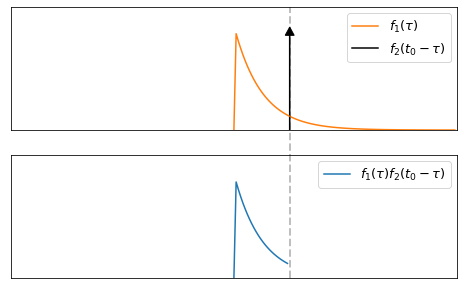

In [ ]:
fig, ax = plt.subplots(2, figsize=(8,5),sharex=True)
t = 25

ax[0].plot(exp_kernel[0:100], c="tab:orange", label=r'$f_1(\tau)$')
ax[0].arrow(t, 0, 0, 0.92, width=0.25, head_width=4, head_length=0.08, fc='k', ec='k', label=r'$f_2(t_0-\tau)$')
ax[0].plot(torch.zeros(0), c="black", label=r'$f_2(t_0-\tau)$')
ax[0].set_ylim([0, 1.2])
ax[0].set_xlim(-100, 100)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[0].legend(fontsize=13) # il

ax[1].axvline(x=t, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False) 
# ax[0].set_ylabel("Input Current ($I_{in}$)")
# ax[0].set_title("Lapicque's Neuron Model With Step Input")

ax[1].set_ylim([0, 1.2])
ax[1].set_xticks([])
ax[1].set_yticks([])


ax[1].plot(torch.zeros(0), label=r'$f_1(\tau)f_2(t_0-\tau)$')
if t >= 0:
  ax[1].plot(exp_kernel[0:t], color="tab:blue")
  # ax[1].fill(np.arange(0, t, 1), exp_kernel[0:t], facecolor='blue', alpha=0.25) 
  # ax[1].fill_between(t, exp_kernel[9:t+10]) 
ax[1].legend(fontsize=13)

plt.show()

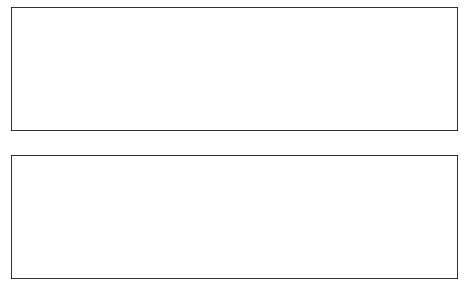

In [ ]:
# exp
fig, ax = plt.subplots(2, figsize=(8,5),sharex=True)

camera = Camera(fig)

for t in range(-50, 75):
  
  ax[0].plot(exp_kernel[0:100], c="tab:orange", label=r'$f_1(\tau)$')
  ax[0].arrow(t, 0, 0, 0.92, width=0.25, head_width=4, head_length=0.08, fc='k', ec='k', label=r'$f_2(t_0-\tau)$')
  ax[0].plot(torch.zeros(0), c="black", label=r'$f_2(t_0-\tau)$')
  ax[0].set_ylim([0, 1.2])
  ax[0].set_xlim(-100, 100)
  ax[0].set_xticks([])
  ax[0].set_yticks([])

  # legend1 = ax[0].legend()
  # legend1.remove()
  # ax[0].legend(loc = "upper left", fontsize=13) # il 

  ax[1].axvline(x=t, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False) 
  # ax[0].set_ylabel("Input Current ($I_{in}$)")
  # ax[0].set_title("Lapicque's Neuron Model With Step Input")

  ax[1].set_ylim([0, 1.2])
  ax[1].set_xticks([])
  ax[1].set_yticks([])


  ax[1].plot(torch.zeros(0), label=r'$f_1(\tau)f_2(t_0-\tau)$')
  if t >= 0:
    ax[1].plot(exp_kernel[0:t], color="tab:blue")
    # ax[1].fill(np.arange(0, t, 1), exp_kernel[0:t], facecolor='blue', alpha=0.5) 
    # ax[1].fill_between(t, exp_kernel[9:t+10]) 
  #   legend2 = ax[1].legend()
  #   legend2.remove()
  # ax[1].legend(loc = "upper left", fontsize=13) # il 

  camera.snap()

# ax[0].get_legend().remove()

# if t >=0:
#   ax[1].get_legend().remove()


anim = camera.animate(interval = 40)
HTML(anim.to_html5_video())

In [ ]:
anim.save('exp.mp4', fps=30) # fps = frames per second

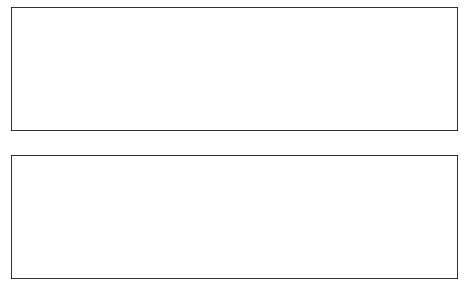

In [ ]:
fig, ax = plt.subplots(2, figsize=(8,5),sharex=True)

camera = Camera(fig)

for t in range(-50, 75):
  
  ax[0].plot(alpha_kernel[0:100], c="tab:orange", label=r'$f_1(\tau)$')
  ax[0].arrow(t, 0, 0, 0.46, width=0.25, head_width=2, head_length=0.04, fc='k', ec='k', label=r'$f_2(t_0-\tau)$')
  ax[0].plot(torch.zeros(0), c="black", label=r'$f_2(t_0-\tau)$')
  ax[0].set_ylim([0, 0.6])
  ax[0].set_xlim(-100, 100)
  ax[0].set_xticks([])
  ax[0].set_yticks([])
  # ax[0].legend(fontsize=13) # il 

  ax[1].axvline(x=t, ymin=0, ymax=2.2, alpha = 0.25, linestyle="dashed", c="black", linewidth=2, zorder=0, clip_on=False) 
  # ax[0].set_ylabel("Input Current ($I_{in}$)")
  # ax[0].set_title("Lapicque's Neuron Model With Step Input")

  ax[1].set_ylim([0, 0.6])
  ax[1].set_xticks([])
  ax[1].set_yticks([])


  ax[1].plot(torch.zeros(0), label=r'$f_1(\tau)f_2(t_0-\tau)$')
  if t >= 0:
    ax[1].plot(alpha_kernel[0:t], color="tab:blue")
    # ax[1].fill(np.arange(0, t, 1), exp_kernel[0:t], facecolor='blue', alpha=0.5) 
    # ax[1].fill_between(t, exp_kernel[9:t+10]) 
  # ax[1].legend(fontsize=13) 

  camera.snap()

anim = camera.animate(interval = 40)
HTML(anim.to_html5_video())

In [ ]:
anim.save('alpha.mp4', fps=30) # fps = frames per second

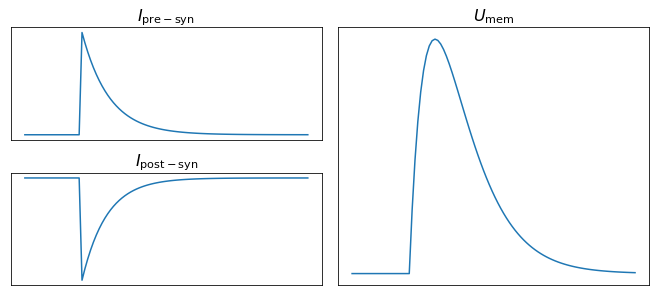

In [115]:
fig3 = plt.figure(constrained_layout=True, figsize=(9,4))
gs = fig3.add_gridspec(2, 2)

f3_ax1 = fig3.add_subplot(gs[0, 0])

f3_ax1.set_xticks([])
f3_ax1.set_yticks([])
f3_ax1.plot(presyn20_rec[0:100])
f3_ax1.set_title("$I_{\\rm pre-syn}$", size=16)

f3_ax2 = fig3.add_subplot(gs[1, 0])
f3_ax2.set_xticks([])
f3_ax2.set_yticks([])
f3_ax2.plot(postsyn20_rec[0:100])
f3_ax2.set_title("$I_{\\rm post-syn}$", size=16)

f3_ax3 = fig3.add_subplot(gs[:, 1])
f3_ax3.set_xticks([])
f3_ax3.set_yticks([])
f3_ax3.plot(mem20_rec[0:100])
f3_ax3.set_title("$U_{\\rm mem}$", size=16)

plt.savefig("alpha.png", dpi=600, facecolor='w')
# plt.show()

In [114]:
plt.savefig("alpha.png", dpi=600, facecolor='w')

<Figure size 432x288 with 0 Axes>